In [1]:
import pandas as pd
import numpy as np

In [2]:
car_df = pd.read_csv('quikr_car.csv')
car_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
car_df.shape

(892, 6)

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# Quality:

### 1 names are pretty inconsistent
### 2 names have company names attached to it
### 3 some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
### 4 company: many of the names are not of any company like 'Used', 'URJENT', and so on.
### 5 year has many non-year values
### 6. year is in object. Change to integer
### 7 Price has Ask for Price
### 8 Price has commas in its prices and is in object
### 9 kms_driven has object values with kms at last.
### 10 It has nan values and two rows have 'Petrol' in them
### 11 fuel_type has nan values

In [5]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# Cleaning Data

### - year has many non-year values


In [6]:
car_df = car_df[car_df['year'].str.isnumeric()]

In [7]:
car_df['year'] = car_df['year'].astype(int)

In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


### - Price has Ask for Price

In [9]:
car_df=car_df[car_df['Price']!='Ask For Price']

### -Price has commas in its prices and is in object

In [10]:
car_df['Price'] = car_df['Price'].str.replace(',', "").astype(int)

In [11]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    int32 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(2), object(4)
memory usage: 38.4+ KB


### - kms_driven has object values with kms at last.

In [12]:
car_df['kms_driven'] = car_df['kms_driven'].str.split().str.get(0).str.replace(',','')

### - It has nan values and two rows have 'Petrol' in them

In [13]:
car_df = car_df[car_df['kms_driven'].str.isnumeric()]

In [14]:
car_df['kms_driven'] = car_df['kms_driven'].astype(int)

In [15]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


### - fuel_type has nan values

In [16]:
car_df = car_df[~car_df['fuel_type'].isna()] #only have all non Nan (missing) values

In [17]:
car_df.shape

(816, 6)

# name and company had spammed data...but with the previous cleaning, those rows got removed.

## Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [18]:
car_df['name'] = car_df['name'].str.split().str.slice(0,3).str.join(' ')

# Resetting the index of the final cleaned data

In [19]:
car_df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


# Cleaned Data

In [20]:
car_df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


# Save Cleaned Car Data

In [21]:
car_df.to_csv('Cleaned_car_data.csv')

In [22]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [23]:
car_df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


# Outlayer in data:
## See max value 8.50000 and 75% is 4.90000
## Thats why we only have values maximam to 6000000


In [24]:
car_df = car_df[car_df['Price']<6000000]

In [25]:
car_df.describe()

,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.442945,4.017933e+05,46277.096933
std,4.005079,3.815888e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56879.000000
max,2019.000000,3.100000e+06,400000.000000


# Checking relationship of Company with Price

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

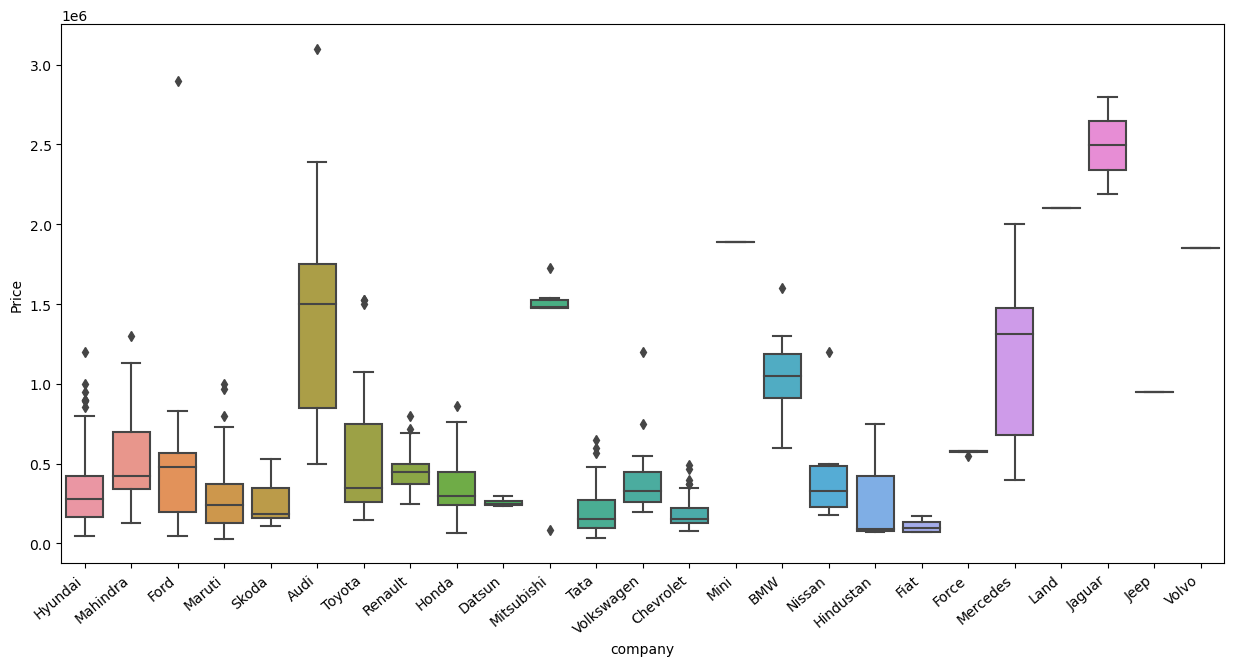

In [27]:
plt.subplots(figsize=(15,7))
ax = sns.boxplot(x='company', y='Price', data=car_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right');

# Checking relationship of Year with Price

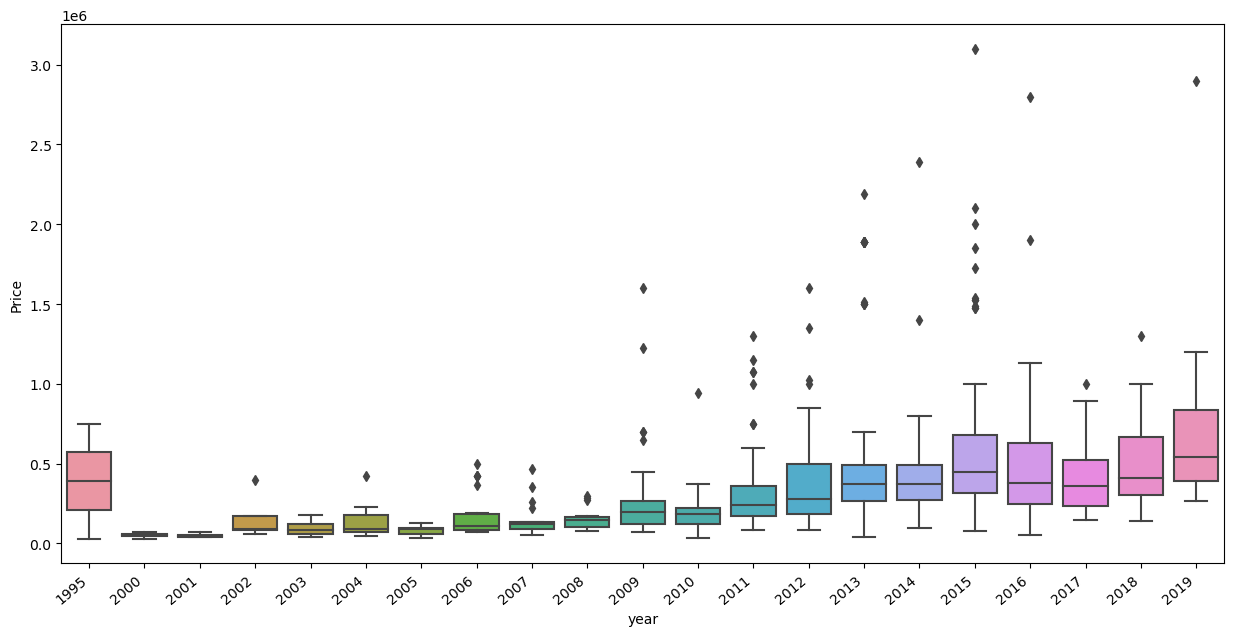

In [28]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='year', y='Price', data=car_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40,  ha='right')
plt.show()

# Checking relationship of kms_driven with Price

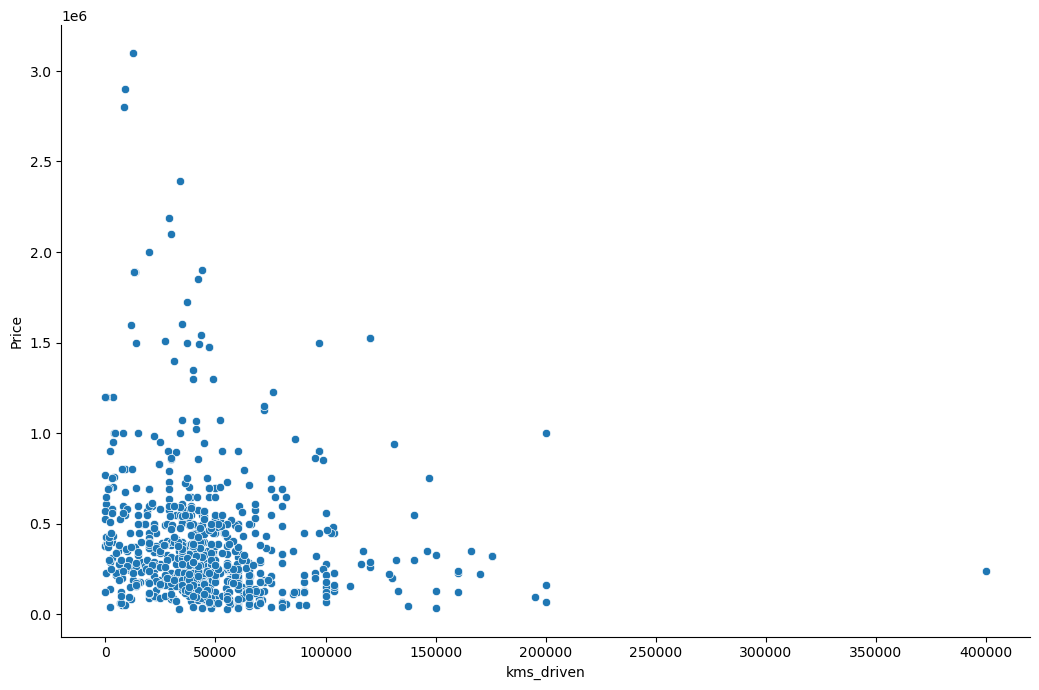

In [29]:
sns.relplot(x='kms_driven',y='Price',data=car_df,height=7,aspect=1.5);

# Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

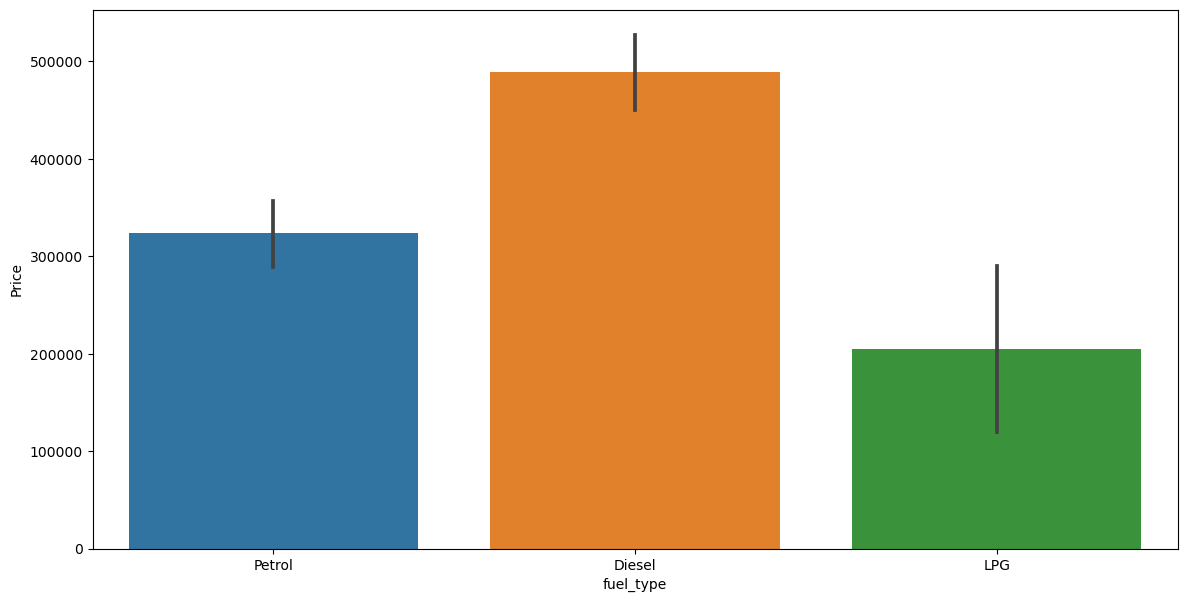

In [30]:
plt.subplots(figsize=(14,7))
sns.barplot(x='fuel_type',y='Price',data=car_df)

# Relationship of Price with FuelType, Year and Company mixed

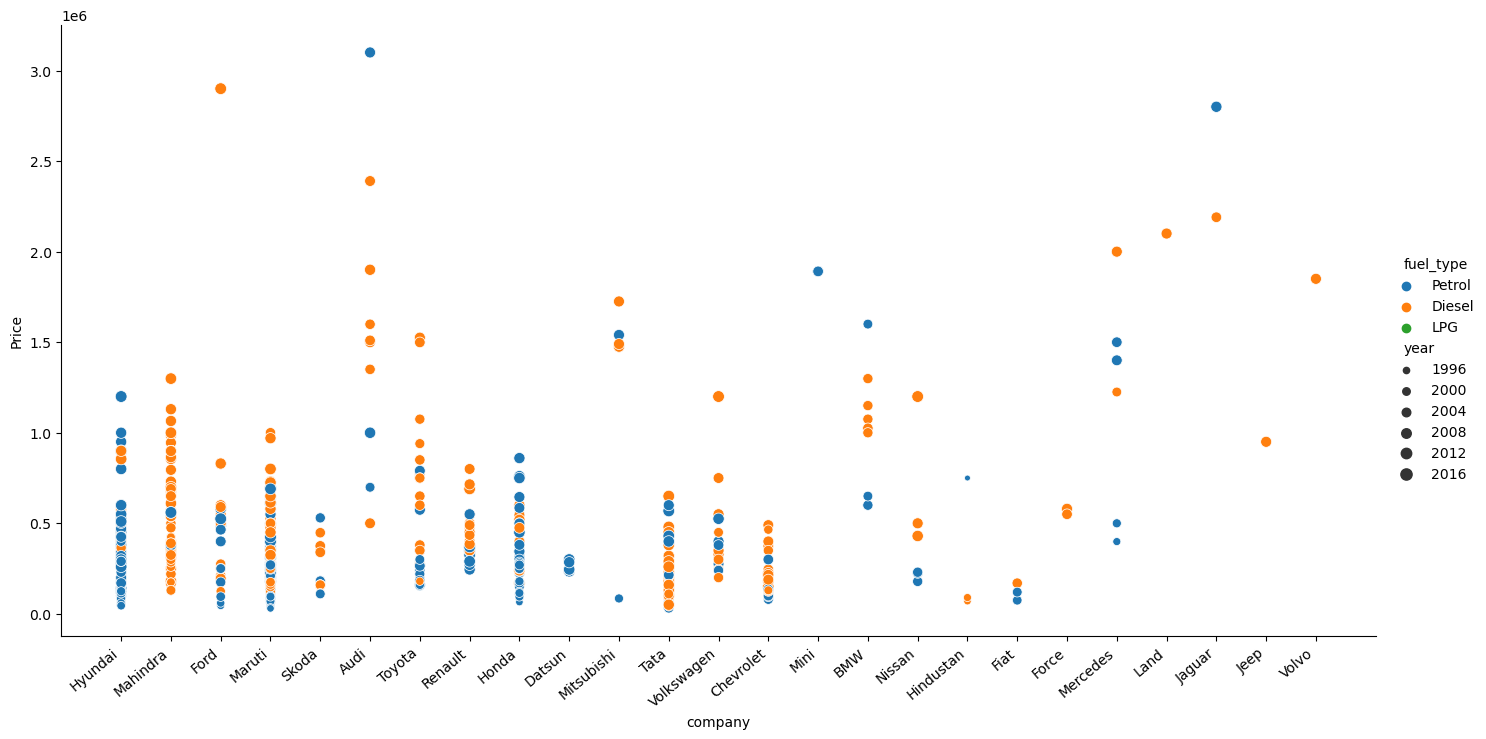

In [31]:
ax=sns.relplot(x='company',y='Price',data=car_df,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right');


# Extracting Training Data

In [32]:
X=car_df[['name','company','year','kms_driven','fuel_type']]
y=car_df['Price']

In [33]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,36000,Diesel
6,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
885,Tata Indica V2,Tata,2009,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,132000,Petrol
888,Tata Zest XM,Tata,2018,27000,Diesel


In [34]:
y.shape

(815,)

# Applying Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Creating an OneHotEncoder object to contain all the possible categories

In [37]:
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

OneHotEncoder()

# Creating a column transformer to transform categorical columns

In [38]:
trans_column=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

# Linear Regression Model


In [39]:
lr=LinearRegression()

# Making a pipeline


In [40]:
pipe = make_pipeline(trans_column, lr)

# Fitting the model

In [41]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [42]:
pipe.score(X_test, y_test)

0.586032307280192

In [43]:
y_pred = pipe.predict(X_test)

# Checking R2 Score

In [44]:
r2_score(y_test, y_pred)

0.586032307280192

# Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [45]:
scores=[]
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=i)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test, y_pred)) 
    
    

In [46]:
np.argmax(scores)

433

In [47]:
scores[np.argmax(scores)]

0.8457042416667213

In [48]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([431205.11067147])

# The best model is found at a certain random state

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(trans_column,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7879315255423491

In [ ]:
import pickle 
pickle.dump(pipe, open('linearRegressionModel.pkl', 'wb'))

## Select model : LinearRegression (Score 0.78)
# --> Try some other MOdels

In [52]:
car_df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error #measures the average of the squares of the errors
from sklearn.metrics import mean_absolute_error #measured as the average absolute difference between the predicted values and the actual values
from sklearn.metrics import r2_score #measure used to determine the proportion of variance in a dependent variable that can be predicted or explained by an independent variable. 


In [56]:
lr2 = LinearRegression ()
dtr = DecisionTreeRegressor()
rfg = RandomForestRegressor ()

In [57]:
#Create Dictinory of Clfs
clfs={
    'lr2':lr2,
    'dtr':dtr,
    'rfg':rfg
}

In [58]:
# Function for Calculate mean_squared, mean_absolute, r2score
def train_classifier(clf, X_train, X_test, y_train, y_test):
    pipe = make_pipeline(trans_column, clf)
    pipe.fit(X_test, y_test)      
    y_pred=pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2s= r2_score(y_test, y_pred)
    
    return mse, mae, r2s
       

In [62]:
train_classifier(lr2,X_train, X_test, y_train, y_test)

(3122621849.402076, 43903.50890373911, 0.9812120957358342)

In [70]:

mean_squared_score_list = []
mean_absolute_score_list = []
r2_score_list = [] 
for name, clf in clfs.items():
    mean_squared, mean_absolute, r2score = train_classifier(clf,X_train, X_test, y_train, y_test)
    print('mean_squared: ',clf, mean_squared)
    print('--------------')
    print('mean_absolute',clf, mean_absolute)
    print('--------------')
    print('r2score',clf, r2score)
    print('--------------')
    
    
    mean_squared_score_list.append(mean_squared)
    mean_absolute_score_list.append(mean_absolute)
    r2_score_list.append(r2score)

mean_squared:  LinearRegression() 3122621849.402076
--------------
mean_absolute LinearRegression() 43903.50890373911
--------------
r2score LinearRegression() 0.9812120957358342
--------------
mean_squared:  DecisionTreeRegressor() 0.0
--------------
mean_absolute DecisionTreeRegressor() 0.0
--------------
r2score DecisionTreeRegressor() 1.0
--------------
mean_squared:  RandomForestRegressor() 18781968557.759068
--------------
mean_absolute RandomForestRegressor() 61570.5306097561
--------------
r2score RandomForestRegressor() 0.8869943771054708
--------------


# Creatig Data Frame

In [74]:
performace_df = pd.DataFrame({'Algorithm': clfs.keys(), 'mean_squared_score':mean_squared_score_list, 'mean_absolute_score':mean_absolute_score_list, 'r2_Score': r2_score_list})

In [75]:
performace_df

,Algorithm,mean_squared_score,mean_absolute_score,r2_Score
0,lr2,3.122622e+09,43903.508904,0.981212
1,dtr,0.000000e+00,0.000000,1.000000
2,rfg,1.878197e+10,61570.530610,0.886994


In [79]:
#reshaping data, turning columns into rows,
performance_df2=pd.melt(performace_df, id_vars="Algorithm")
performance_df2

,Algorithm,variable,value
0,lr2,mean_squared_score,3.122622e+09
1,dtr,mean_squared_score,0.000000e+00
2,rfg,mean_squared_score,1.878197e+10
3,lr2,mean_absolute_score,4.390351e+04
4,dtr,mean_absolute_score,0.000000e+00
5,rfg,mean_absolute_score,6.157053e+04
6,lr2,r2_Score,9.812121e-01
7,dtr,r2_Score,1.000000e+00
8,rfg,r2_Score,8.869944e-01


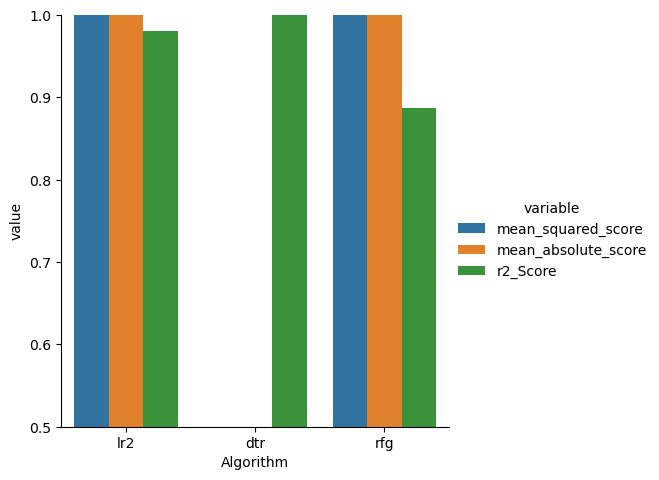

In [94]:
sns.catplot(x="Algorithm", y='value', hue='variable', data=performance_df2, kind='bar', height=5)
plt.ylim(0.5,1.0) #used to get or set the y-limits of the current axes
plt.show()

In [95]:
 pipe_dtr = make_pipeline(trans_column, dtr)

In [100]:
pickle.dump(pipe_dtr,open('DecisionTreeRegressor_model.pkl','wb'))